# Ensemble Energy data exercise

- Problem Statement:

Build a predictive model for predicting 'Target' variable using all the features.  Goal is to increase the F1 score. And please explain why F1 score is the right metric for this problem. 

Please use Pythion and send the code and results summary (confusion matrix) in 48 hours.

Note: Please replace all the missing values/nulls with zeroes.


- Solution:

In [236]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
rcParams['figure.figsize'] = 15,7
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, fbeta_score, average_precision_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
from imblearn.combine import SMOTETomek

%matplotlib inline

## Loading Data

In [237]:
data = pd.read_excel('./Data for classification.xlsx')

In [238]:
data.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,Target
0,C1,33.05,0.36,NaN,1.0,0.0,0.0,0.0,NaN,NaN,...,42.0,7.0,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN
1,C4,29.01,0.35,NaN,1.0,0.0,0.0,0.0,4.0,NaN,...,45.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,NaN
2,C5,60.10,0.10,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,26.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,C6,23.05,0.92,NaN,0.0,0.0,1.0,0.0,1.0,NaN,...,26.0,6.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,NaN
4,C8,44.18,1.18,NaN,1.0,0.0,0.0,0.0,NaN,NaN,...,20.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,NaN


In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15070 entries, 0 to 15069
Data columns (total 21 columns):
ID            15070 non-null object
feature_1     15070 non-null float64
feature_2     13892 non-null float64
feature_3     114 non-null float64
feature_4     13078 non-null float64
feature_5     13078 non-null float64
feature_6     13078 non-null float64
feature_7     13078 non-null float64
feature_8     4285 non-null float64
feature_9     0 non-null float64
feature_10    14945 non-null float64
feature_11    13292 non-null float64
feature_12    7800 non-null float64
feature_13    3374 non-null float64
feature_14    807 non-null float64
feature_15    13651 non-null float64
feature_16    13651 non-null float64
feature_17    8750 non-null float64
feature_18    6899 non-null float64
feature_19    9912 non-null float64
Target        2044 non-null float64
dtypes: float64(20), object(1)
memory usage: 2.4+ MB


## Preprocessing

In [240]:
data = data.fillna(0)
data.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,Target
0,C1,33.05,0.36,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,42.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C4,29.01,0.35,0.0,1.0,0.0,0.0,0.0,4.0,0.0,...,45.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,C5,60.10,0.10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C6,23.05,0.92,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,26.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,C8,44.18,1.18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [241]:
## checking for nulls after imputing 0
print ('Number of null in the set : ', pd.isnull(data).sum())

Number of null in the set :  ID            0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
Target        0
dtype: int64


### Checking response class balance

In [242]:
valueCounts = data.Target.value_counts() / len(data)
print (valueCounts)

0.0    0.890046
1.0    0.109954
Name: Target, dtype: float64


- We see that there is an imbalance of classes, where positive class is just 10% of the dataset

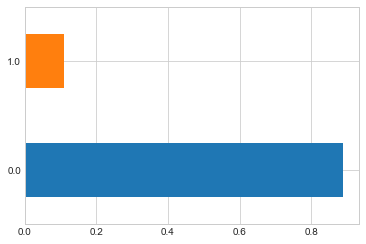

In [243]:
valueCounts.plot.barh()

### preparing the data for training

In [244]:
print ('Dimension of each observation : ', (data[:1].shape))
print ('Shape of the training set : ', data.shape)

Dimension of each observation :  (1, 21)
Shape of the training set :  (15070, 21)


- We will ignore ID in training as it is unique for each observation and does not contribute to classification. Although, we could have Label encoded the ID but it doesn't make sense to use it in the model when it is not contributing to the classification

In [245]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:20], data.Target, test_size=0.2, random_state=3)

In [246]:
print('Shape of Training data : ', x_train.shape)
print('Shape of Testing data : ', x_test.shape)

Shape of Training data :  (12056, 19)
Shape of Testing data :  (3014, 19)


In [247]:
valueCounts = y_train.value_counts() / len(y_train)
print ('Checking balance of response variable in Training set:\n', valueCounts)

Checking balance of response variable in Training set:
 0.0    0.89076
1.0    0.10924
Name: Target, dtype: float64


## EDA

### Feature Correlation

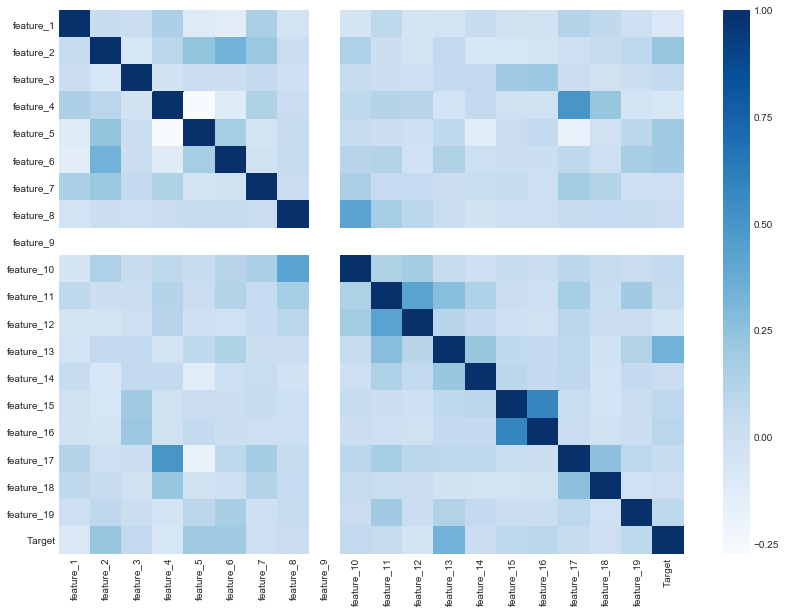

In [248]:
fig = plt.figure(figsize=(14,10))
# sns.set(font_scale=1.2)
numerical_feature=data.dtypes[data.dtypes!= 'object'].index
corr = data[numerical_feature].corr()
sns.heatmap(corr, cmap='Blues')

We don't see any significant correlation between features and target, so we won't explore the correlation any further

## Training and Validation

### Validation metrics

- F1 score : F-score is based on the precision and recall of the results which means that it individually focuses on prediction of each class rather than a common accuracy. In cases like these where dataset is imbalanced, the accuracy might turn out to be high by just predicting all observations as negatives (or majority class), but in reality out model is not performing well at all as it is not able to classify between the two classes. 
- F(2) score / F(0.5) score : F(2) or F(0.5) scores can also be used depending on the use-case and requirement of reducing false positives or false negatives.
- Confusion matrix gives us a good overview at each step about the performance of the model in each section of the prediction. 
- AUC precision-recall curve : Area under the precision recall curve tells us the precision and recall performance irrespective of the threshold put on the predicted probability (soft predictions) to convert it into 1 & 0 (hard predictions).
- Below I have tracked multiple metrics to make a comparision.

In [249]:
def score_res(true_res, pred_res, pred_prob=-1):
    if type(pred_prob) != int:
        lloss = log_loss(true_res, pred_prob)
        auc = average_precision_score(true_res, pred_prob[:,1])
        print ('Log Loss : {}'.format(lloss))
        print ('AUC precision-recall curve : {}'.format(auc))
    accuracy = accuracy_score(true_res, pred_res)
    f1 = f1_score(true_res, pred_res)
    f2 = fbeta_score(true_res, pred_res, 2)
    print ('F1 Score: {}'.format(f1))
    print ('F2 Score: {}'.format(f2))
    print ('Accuracy : {}'.format(accuracy))
    print ('\n Confusion Matrix : \n', confusion_matrix(true_res, pred_res))

### Interactive confusion matrix using plotly

- I am also using a interactive confusion matrix from plotly to make the inference easier and quicker

In [250]:
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import plotly.graph_objs as go

In [251]:
def int_conf_mat(x, y):
    init_notebook_mode(connected=True)

    trace1 = {
      "x": np.unique(y), 
      "y": np.unique(y), 
      "z": confusion_matrix(x, y), 
      "colorscale": "Jet", 
      "type": "heatmap"
    }
    data_plot = [trace1]
    layout = {
      "width": 500,
      "height": 500,
      "barmode": "overlay", 
      "title": "Confusion Matrix", 
      "xaxis": {
        "title": "Predicted value", 
        "titlefont": {
          "color": "#7f7f7f", 
          "family": "Courier New, monospace", 
          "size": 18
        }
      }, 
      "yaxis": {
        "title": "True Value", 
        "titlefont": {
          "color": "#7f7f7f", 
          "family": "Courier New, monospace", 
          "size": 18
        }
      }
    }
    fig = go.Figure(data=data_plot, layout=layout)
    plotly.offline.iplot(fig)

### Model - Logistic regression

In [252]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [253]:
predictions = lr.predict(x_train)
prediction_probs = lr.predict_proba(x_train)
score_res(y_train, predictions, prediction_probs)

Log Loss : 0.26030486359573085
AUC precision-recall curve : 0.4632397126300919
F1 Score: 0.3708894878706199
F2 Score: 0.296245263520496
Accuracy : 0.9032017252820173

 Confusion Matrix : 
 [[10545   194]
 [  973   344]]


In [254]:
predictions = lr.predict(x_test)
prediction_probs = lr.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 0.2633482226082324
AUC precision-recall curve : 0.47628946206619804
F1 Score: 0.34557235421166305
F2 Score: 0.26972353337828725
Accuracy : 0.8994691439946915

 Confusion Matrix : 
 [[2631   43]
 [ 260   80]]


In [255]:
int_conf_mat(y_test, predictions)

## Handling class imbalance

- We will tune hyperparameters and try other models after balancing the classes as we see that it is affecting the performance immensely and would be useless to try other techniques with imbalanced dataset

In [256]:
x_train_org, x_test_org = train_test_split(data.iloc[:,1:], test_size=0.2, random_state=3)

In [257]:
count_class_0, count_class_1 = x_train_org.Target.value_counts()

x_train_class_0 = x_train_org[x_train_org['Target'] == 0]
x_train_class_1 = x_train_org[x_train_org['Target'] == 1]

### Random Under-sampling

Random under-sampling:
 1.0    1317
0.0    1317
Name: Target, dtype: int64


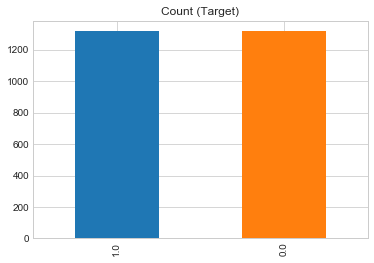

In [258]:
x_train_class_0_under = x_train_class_0.sample(count_class_1)
x_train_train_under = pd.concat([x_train_class_0_under, x_train_class_1], axis=0)

print('Random under-sampling:\n', x_train_train_under.Target.value_counts())

x_train_train_under.Target.value_counts().plot(kind='bar', title='Count (Target)');

In [259]:
x_train, y_train, x_test, y_test = x_train_train_under.iloc[:,:19], x_train_train_under.Target, x_test_org.iloc[:,:19], x_test_org.Target

In [260]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [261]:
predictions = lr.predict(x_train)
prediction_probs = lr.predict_proba(x_train)
score_res(y_train, predictions, prediction_probs)

Log Loss : 0.4999953376199675
AUC precision-recall curve : 0.8349941319759391
F1 Score: 0.753983676642052
F2 Score: 0.7434089515634579
Accuracy : 0.7596810933940774

 Confusion Matrix : 
 [[1031  286]
 [ 347  970]]


In [262]:
predictions = lr.predict(x_test)
prediction_probs = lr.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 0.49596129846869846
AUC precision-recall curve : 0.4570249842356252
F1 Score: 0.4374453193350832
F2 Score: 0.5779010633379565
Accuracy : 0.7866622428666225

 Confusion Matrix : 
 [[2121  553]
 [  90  250]]


In [263]:
int_conf_mat(y_test, predictions)

### Random Over-sampling

Random over-sampling:
 1.0    10739
0.0    10739
Name: Target, dtype: int64


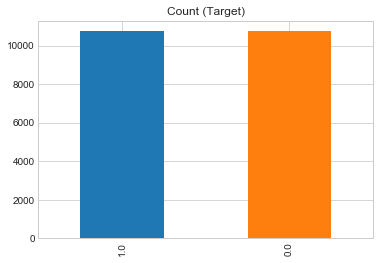

In [264]:
x_train_class_1_over = x_train_class_1.sample(count_class_0, replace=True)
x_train_train_over = pd.concat([x_train_class_0, x_train_class_1_over], axis=0)

print('Random over-sampling:\n', x_train_train_over.Target.value_counts())

x_train_train_over.Target.value_counts().plot(kind='bar', title='Count (Target)');

In [265]:
x_train, y_train, x_test, y_test = x_train_train_over.iloc[:,:19], x_train_train_over.Target, x_test_org.iloc[:,:19], x_test_org.Target

In [266]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [267]:
predictions = lr.predict(x_train)
prediction_probs = lr.predict_proba(x_train)
score_res(y_train, predictions, prediction_probs)

Log Loss : 0.4963574338666966
AUC precision-recall curve : 0.8365907606065066
F1 Score: 0.7573065902578796
F2 Score: 0.7458095829335741
Accuracy : 0.7633857901108111

 Confusion Matrix : 
 [[8467 2272]
 [2810 7929]]


In [268]:
predictions = lr.predict(x_test)
prediction_probs = lr.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 0.487620177997697
AUC precision-recall curve : 0.47380196601947916
F1 Score: 0.44000000000000006
F2 Score: 0.5829493087557603
Accuracy : 0.7863304578633046

 Confusion Matrix : 
 [[2117  557]
 [  87  253]]


In [269]:
int_conf_mat(y_test, predictions)

### SMOTE + Tomek links (Synthetic Minority oversampling followed by Tomek Links)

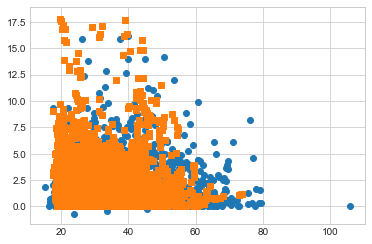

In [270]:
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(x_train_org.iloc[:,:19], x_train_org.Target)
colors = ['#1F77B4', '#FF7F0E']
markers = ['o', 's']
for l, c, m in zip(np.unique(y_smt), colors, markers):
        plt.scatter(
            X_smt[y_smt==l, 0],
            X_smt[y_smt==l, 1],
            c=c, label=l, marker=m
        )

In [271]:
X_smt.shape, y_smt.shape

((21370, 19), (21370,))

In [272]:
x_train, y_train, x_test, y_test = X_smt, y_smt, x_test_org.iloc[:,:19], x_test_org.Target

In [273]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [274]:
predictions = lr.predict(x_train)
prediction_probs = lr.predict_proba(x_train)
score_res(y_train, predictions, prediction_probs)

Log Loss : 0.4764636881675404
AUC precision-recall curve : 0.8417128347055829
F1 Score: 0.7717225609756099
F2 Score: 0.7634739005033273
Accuracy : 0.7757604117922321

 Confusion Matrix : 
 [[8478 2207]
 [2585 8100]]


In [275]:
predictions = lr.predict(x_test)
prediction_probs = lr.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 0.4811466989176858
AUC precision-recall curve : 0.47361101766682023
F1 Score: 0.43932683790965454
F2 Score: 0.577012563983248
Accuracy : 0.789980092899801

 Confusion Matrix : 
 [[2133  541]
 [  92  248]]


In [276]:
int_conf_mat(y_test, predictions)

- We can see best results, out of the three sampling techniques, in SMOTE + Tomek links technique. We'll tune the hyperparameters for this sampled dataset and try other model which can possibly perform better.

### Hyperparameter tuning for Logistic Regression

In [277]:
lr = LogisticRegression()

print('Best Hyperparameters -')

# regularization penalty options
penalty = ['l1', 'l2']

# regularization hyperparameter options
C = [0.01, 0.3, 0.7, 1.0, 4, 10]

# hyperparameter dictionary
hyperparameters = dict(C=C, penalty=penalty, n_jobs=[-1])

# grid search using 5-fold cross validation
clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0, scoring='f1')

# Fit grid search
best_model = clf.fit(x_train, y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Hyperparameters -
Best Penalty: l2
Best C: 0.01


In [278]:
# Prediction using best model
predictions = best_model.predict(x_test)
prediction_probs = best_model.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 0.4886806421967978
AUC precision-recall curve : 0.46795549405748005
F1 Score: 0.4413793103448275
F2 Score: 0.5871559633027522
Accuracy : 0.7850033178500332

 Confusion Matrix : 
 [[2110  564]
 [  84  256]]


### Model - Random Forest classifier with Hyperparemeter tuning

In [279]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [280]:
predictions = rfc.predict(x_test)
prediction_probs = rfc.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 0.8056224468290331
AUC precision-recall curve : 0.38703997607943197
F1 Score: 0.4127579737335835
F2 Score: 0.3541532517707663
Accuracy : 0.8961512939615129

 Confusion Matrix : 
 [[2591   83]
 [ 230  110]]


In [281]:
## Hyperparameter Tuning

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [4, 10],
    'n_estimators': [50, 100, 300, 500]
}
# Create a based model
rfc = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1, scoring='f1')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  3.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 100], 'max_features': [2, 3], 'min_samples_leaf': [3, 5], 'min_samples_split': [4, 10], 'n_estimators': [50, 100, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [282]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 500}

In [283]:
best_grid = grid_search.best_estimator_
predictions = best_grid.predict(x_test)
prediction_probs = best_grid.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 0.27141046277333547
AUC precision-recall curve : 0.47626631485561993
F1 Score: 0.4110091743119267
F2 Score: 0.35782747603833864
Accuracy : 0.8934970139349702

 Confusion Matrix : 
 [[2581   93]
 [ 228  112]]


In [284]:
int_conf_mat(y_test, predictions)

### Fitting KNN

- Being an algorithm which is easy to implement and understand, KNN is a good choice to experiment.
- It sometimes might give better results than other complicated algorithms if the points are distinctly seperated in the vector space 

In [285]:
knn = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='uniform')

In [286]:
predictions = knn.predict(x_test)
prediction_probs = knn.predict_proba(x_test)
score_res(y_test, predictions, prediction_probs)

Log Loss : 2.5564632625422172
AUC precision-recall curve : 0.21861323501668417
F1 Score: 0.2983508245877061
F2 Score: 0.42268479184367036
Accuracy : 0.6894492368944923

 Confusion Matrix : 
 [[1879  795]
 [ 141  199]]


In [287]:
int_conf_mat(y_test, predictions)

## Comments

---------

- We have tried three different type of models here. And we are tuning hyperparameters to optimize F1 score.
- We can use Logistic regression or Random Forest model from these to go ahead with our predictions. The performance of both models is comparable and we can choose one of them based on our use-case. 
- We can also see that KNN increases the number of positive predictions, which is a good thing and can be used to optimize sampling.
- We could have used feature engineering techniques (target encoding, feature generation, etc.) with some knowledge about the features and the target variable.
- We can also use other anomaly detection and class balancing techniques with some knowledge of the variables and the exact requirement about the class we need to optimize.

--------